# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Alvin Astradinata]
- **Email:** [alvnastr@gmail.com]
- **ID Dicoding:** [alvnastr]

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi visual sepeda saat digunakan pada hari kerja, hari libur, dan akhir pekan?
- Apakah terdapat korelasi antara musim dan jumlah pengguna sepeda yang terdaftar maupun tidak terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi data pada day_df: ", day_df.duplicated().sum())

Jumlah duplikasi data pada day_df:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai `hour_df`

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi data pada hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi data pada hour_df:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [12]:
day_df.drop(columns=['instant'], inplace=True)
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
# Mengubah nama kolom
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_user',
    'registered': 'registered_user',
    'cnt': 'total_user'
}, inplace=True)

day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,wind_speed,casual_user,registered_user,total_user
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
# Mengubah tipe data pada kolom date menjadi datetime
day_df['date'] = pd.to_datetime(day_df['date'])

In [15]:
# Mengubah nilai categorical menjadi string
day_df['month'] = day_df['month'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})
day_df['weather'] = day_df['weather'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
})

In [16]:
# Mengubah tipe data categorical
day_df['season'] = day_df['season'].astype('category')
day_df['year'] = day_df['year'].astype('category')
day_df['month'] = day_df['month'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weather'] = day_df['weather'].astype('category')

day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temperature,feeling_temperature,humidity,wind_speed,casual_user,registered_user,total_user
0,2011-01-01,Spring,0,January,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,January,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 731 non-null    datetime64[ns]
 1   season               731 non-null    category      
 2   year                 731 non-null    category      
 3   month                731 non-null    category      
 4   holiday              731 non-null    category      
 5   weekday              731 non-null    category      
 6   workingday           731 non-null    category      
 7   weather              731 non-null    category      
 8   temperature          731 non-null    float64       
 9   feeling_temperature  731 non-null    float64       
 10  humidity             731 non-null    float64       
 11  wind_speed           731 non-null    float64       
 12  casual_user          731 non-null    int64         
 13  registered_user      731 non-null  

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [18]:
day_df.groupby(by='month', observed=False).agg({
    'total_user': ['max', 'min', 'mean', 'sum']
})

total_user                           
                 max   min         mean     sum
month                                          
April           7460   795  4484.900000  269094
August          7865  1115  5664.419355  351194
December        6606   441  3403.806452  211036
February        5062  1005  2655.298246  151352
January         4521   431  2176.338710  134933
July            8173  3285  5563.677419  344948
June            8120  3767  5772.366667  346342
March           8362   605  3692.258065  228920
May             8294  2633  5349.774194  331686
November        6852  1495  4247.183333  254831
October         8156    22  5199.225806  322352
September       8714  1842  5766.516667  345991

In [19]:
day_df.groupby(by='weather', observed=False).agg({
    'total_user': ['max', 'min', 'mean', 'sum']
})

total_user                           
                  max  min         mean      sum
weather                                         
Clear            8714  431  4876.786177  2257952
Light Rain       4639   22  1803.285714    37869
Mist             8362  605  4035.862348   996858

In [20]:
day_df.groupby(by='holiday', observed=False).agg({
    'total_user': ['max', 'min', 'mean', 'sum']
})

total_user                            
               max   min         mean      sum
holiday                                       
0             8714    22  4527.104225  3214244
1             7403  1000  3735.000000    78435

In [21]:
day_df.groupby(by='weekday', observed=False).agg({
    'total_user': ['max', 'min', 'mean', 'sum']
})

total_user                           
                 max   min         mean     sum
weekday                                        
Friday          8362  1167  4690.288462  487790
Monday          7525    22  4338.123810  455503
Saturday        8714   627  4550.542857  477807
Sunday          8227   605  4228.828571  444027
Thursday        7804   431  4667.259615  485395
Tuesday         7767   683  4510.663462  469109
Wednesday       8173   441  4548.538462  473048

In [22]:
day_df.groupby(by='workingday', observed=False).agg({
    'total_user': ['max', 'min', 'mean', 'sum']
})

total_user                           
                  max  min         mean      sum
workingday                                      
0                8714  605  4330.168831  1000269
1                8362   22  4584.820000  2292410

In [23]:
day_df.groupby(by='season', observed=False).agg({
    'casual_user': 'mean',
    'registered_user': 'mean',
    'total_user': ['max', 'min', 'mean']
})

casual_user registered_user total_user                   
               mean            mean        max   min         mean
season                                                           
Fall    1202.611702     4441.691489       8714  1115  5644.303191
Spring   334.928177     2269.204420       7836   431  2604.132597
Summer  1106.097826     3886.233696       8362   795  4992.331522
Winter   729.112360     3999.050562       8555    22  4728.162921

In [24]:
day_df.groupby(by='season', observed=False).agg({
    'temperature': ['max', 'min', 'mean'],
    'feeling_temperature': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean']
})

temperature                     feeling_temperature            \
               max       min      mean                 max       min   
season                                                                 
Fall      0.861667  0.469167  0.706309            0.840896  0.242400   
Spring    0.572500  0.059130  0.297748            0.548617  0.079070   
Summer    0.808333  0.253043  0.544405            0.757579  0.250339   
Winter    0.657500  0.220833  0.422906            0.607975  0.227913   

                  humidity                      
            mean       max       min      mean  
season                                          
Fall    0.655898  0.939565  0.360000  0.633482  
Spring  0.296914  0.948261  0.000000  0.582903  
Summer  0.520307  0.922500  0.254167  0.626948  
Winter  0.415539  0.972500  0.333478  0.668719

In [25]:
# Analisis casual_user, registered_user, total_user berdasarkan bulan
result_user = day_df.groupby(by='month', observed=False).agg({
    'casual_user': ['max', 'min', 'mean', 'sum'],
    'registered_user': ['max', 'min', 'mean', 'sum'],
    'total_user': ['max', 'min', 'mean', 'sum']
})

result_user

casual_user                          registered_user        \
                  max  min         mean    sum             max   min   
month                                                                  
April            3252  120  1013.366667  60802            5950   674   
August           2827  226  1161.919355  72039            6541   889   
December         1153    9   349.887097  21693            6055   432   
February         1435   47   262.508772  14963            4546   905   
January          1070    9   194.225806  12042            4185   416   
July             3065  562  1260.596774  78157            6790  2298   
June             2963  477  1231.766667  73906            6456  2993   
March            3155   46   716.838710  44444            5893   491   
May              3410  255  1214.274194  75285            6433  2213   
November         2290   69   610.050000  36603            5520   935   
October          3031    2   963.870968  59760            6911    20   
September        3160  118  1172.050000  70323            6946  1689   

                               total_user                             
                  mean     sum        max   min         mean     sum  
month                                                                 
April      3471.533333  208292       7460   795  4484.900000  269094  
August     4502.500000  279155       7865  1115  5664.419355  351194  
December   3053.919355  189343       6606   441  3403.806452  211036  
February   2392.789474  136389       5062  1005  2655.298246  151352  
January    1982.112903  122891       4521   431  2176.338710  134933  
July       4303.080645  266791       8173  3285  5563.677419  344948  
June       4540.600000  272436       8120  3767  5772.366667  346342  
March      2975.419355  184476       8362   605  3692.258065  228920  
May        4135.500000  256401       8294  2633  5349.774194  331686  
November   3637.133333  218228       6852  1495  4247.183333  254831  
October    4235.354839  262592       8156    22  5199.225806  322352  
September  4594.466667  275668       8714  1842  5766.516667  345991

In [26]:
result_user.columns = ['_'.join(col).strip() for col in result_user.columns.values]

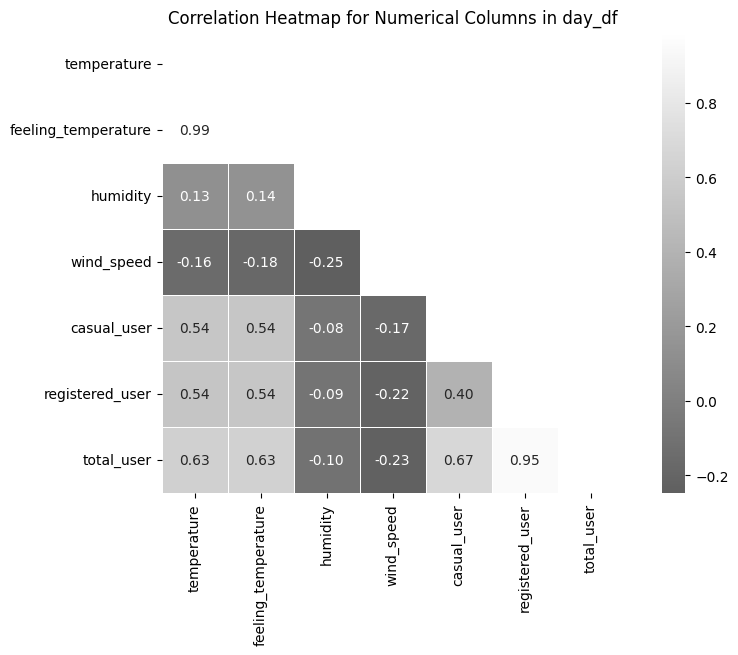

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="grey",
    center=0,
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap for Numerical Columns in day_df")
plt.show()

### Analisis Berdasarkan Correlation Heatmap

Berdasarkan heatmap korelasi yang telah dibuat, kita dapat menarik beberapa kesimpulan mengenai hubungan antara berbagai variabel numerik dalam dataset `day_df`. Berikut adalah beberapa poin penting dari analisis korelasi tersebut:

1. **Korelasi Positif Kuat:**
    - **Temperature dan Feeling Temperature:** Terdapat korelasi positif yang sangat kuat (0.99) antara suhu aktual (`temperature`) dan suhu yang dirasakan (`feeling_temperature`). Hal ini menunjukkan bahwa suhu yang dirasakan sangat dipengaruhi oleh suhu aktual.
    - **Total User dan Registered User:** Korelasi positif yang sangat kuat (0.95) antara jumlah total pengguna (`total_user`) dan pengguna terdaftar (`registered_user`). Ini menunjukkan bahwa sebagian besar pengguna sepeda adalah pengguna terdaftar.
    - **Total User dan Casual User:** Terdapat korelasi positif yang kuat (0.67) antara jumlah total pengguna (`total_user`) dan pengguna kasual (`casual_user`). Ini menunjukkan bahwa pengguna kasual juga berkontribusi signifikan terhadap jumlah total pengguna.

2. **Korelasi Negatif:**
    - **Humidity dan Wind Speed:** Terdapat korelasi negatif (-0.25) antara kelembaban (`humidity`) dan kecepatan angin (`wind_speed`). Ini menunjukkan bahwa ketika kelembaban tinggi, kecepatan angin cenderung lebih rendah, dan sebaliknya.
    - **Wind Speed dan Registered User:** Terdapat korelasi negatif (-0.22) antara kecepatan angin (`wind_speed`) dan pengguna terdaftar (`registered_user`). Ini menunjukkan bahwa kecepatan angin yang tinggi mungkin mengurangi jumlah pengguna terdaftar.

3. **Korelasi Sedang:**
    - **Temperature dan Total User:** Terdapat korelasi positif sedang (0.63) antara suhu (`temperature`) dan jumlah total pengguna (`total_user`). Ini menunjukkan bahwa suhu yang lebih tinggi cenderung meningkatkan jumlah pengguna sepeda.
    - **Feeling Temperature dan Total User:** Terdapat korelasi positif sedang (0.63) antara suhu yang dirasakan (`feeling_temperature`) dan jumlah total pengguna (`total_user`). Ini menunjukkan bahwa suhu yang dirasakan juga mempengaruhi jumlah pengguna sepeda.

4. **Korelasi Lemah:**
    - **Humidity dan Total User:** Terdapat korelasi negatif lemah (-0.10) antara kelembaban (`humidity`) dan jumlah total pengguna (`total_user`). Ini menunjukkan bahwa kelembaban memiliki pengaruh yang kecil terhadap jumlah pengguna sepeda.

Dari analisis ini, kita dapat menyimpulkan bahwa faktor-faktor seperti suhu, baik suhu aktual maupun suhu yang dirasakan, memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda. Selain itu, kecepatan angin juga mempengaruhi jumlah pengguna, terutama pengguna terdaftar. Kelembaban, meskipun memiliki korelasi negatif, tampaknya memiliki pengaruh yang lebih kecil dibandingkan dengan variabel lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi visual sepeda saat digunakan pada hari kerja, hari libur, dan akhir pekan?

In [28]:
day_df['day_type'] = day_df['date'].apply(lambda x: 'weekday' if x.weekday() < 5 else 'weekend')

In [29]:
grouped_data = day_df.groupby('day_type').agg({
    'casual_user': 'sum',
    'registered_user': 'sum',
    'total_user': 'sum'
}).reset_index()

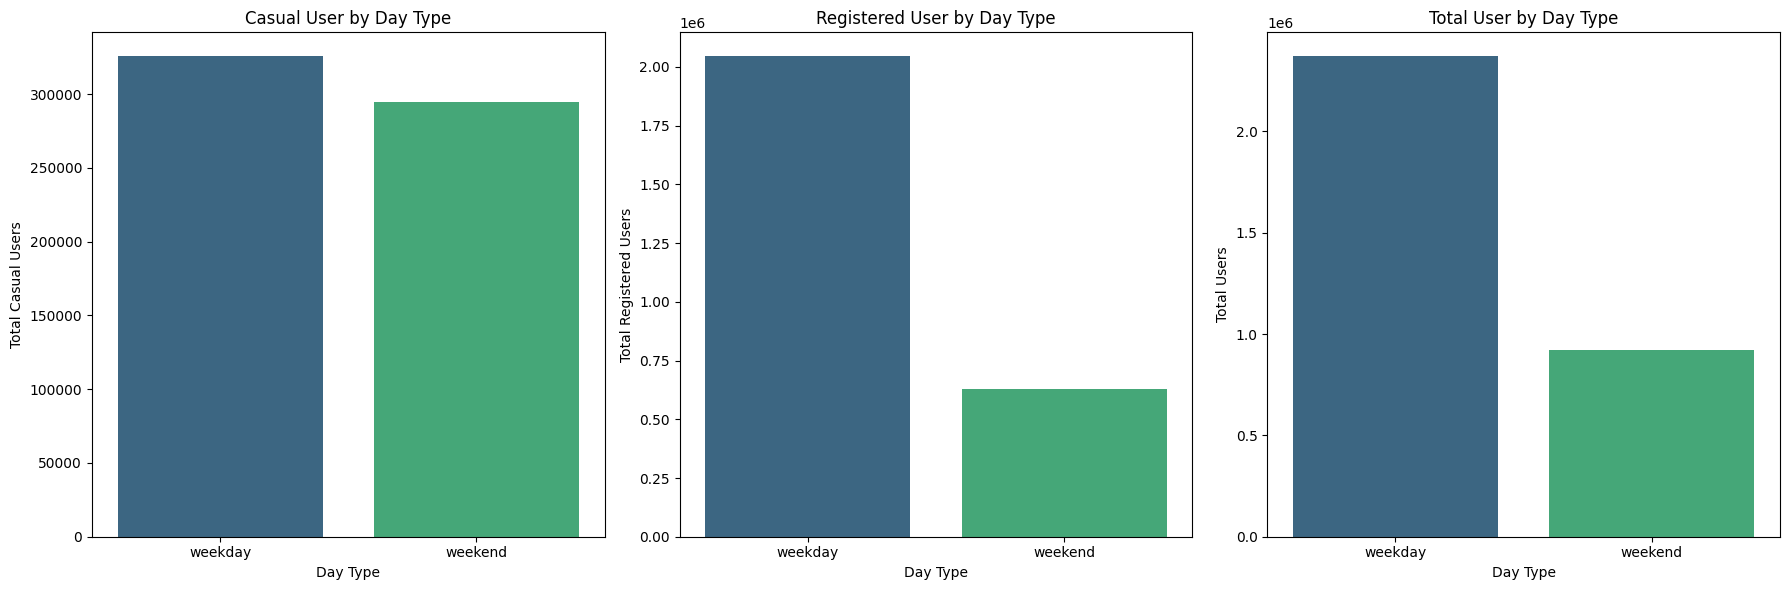

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot untuk casual_user
sns.barplot(x='day_type', y='casual_user', hue='day_type', data=grouped_data, ax=ax[0], palette='viridis', dodge=False, legend=False)
ax[0].set_title('Casual User by Day Type')
ax[0].set_xlabel('Day Type')
ax[0].set_ylabel('Total Casual Users')

# Plot untuk registered_user
sns.barplot(x='day_type', y='registered_user', hue='day_type', data=grouped_data, ax=ax[1], palette='viridis', dodge=False, legend=False)
ax[1].set_title('Registered User by Day Type')
ax[1].set_xlabel('Day Type')
ax[1].set_ylabel('Total Registered Users')

# Plot untuk total_user
sns.barplot(x='day_type', y='total_user', hue='day_type', data=grouped_data, ax=ax[2], palette='viridis', dodge=False, legend=False)
ax[2].set_title('Total User by Day Type')
ax[2].set_xlabel('Day Type')
ax[2].set_ylabel('Total Users')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah terdapat korelasi antara musim dan jumlah pengguna sepeda yang terdaftar maupun tidak terdaftar?

In [31]:
grouped_data = day_df.groupby('season', observed=False).agg({
    'casual_user': 'sum',
    'registered_user': 'sum',
    'total_user': 'sum'
}).reset_index()

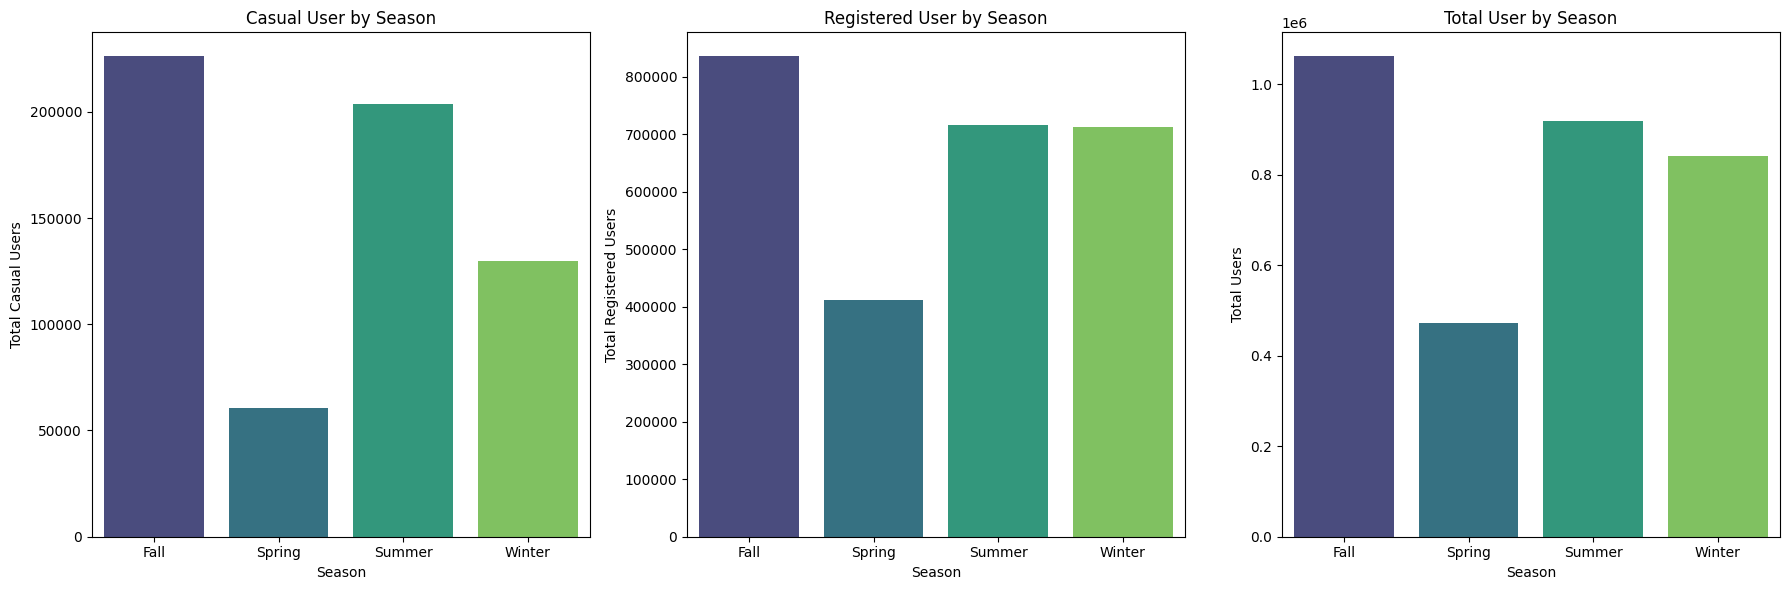

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot untuk casual_user
sns.barplot(x='season', y='casual_user', hue='season', data=grouped_data, ax=ax[0], palette='viridis', dodge=False, legend=False)
ax[0].set_title('Casual User by Season')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Total Casual Users')

# Plot untuk registered_user
sns.barplot(x='season', y='registered_user', hue='season', data=grouped_data, ax=ax[1], palette='viridis', dodge=False, legend=False)
ax[1].set_title('Registered User by Season')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Total Registered Users')

# Plot untuk total_user
sns.barplot(x='season', y='total_user', hue='season', data=grouped_data, ax=ax[2], palette='viridis', dodge=False, legend=False)
ax[2].set_title('Total User by Season')
ax[2].set_xlabel('Season')
ax[2].set_ylabel('Total Users')

plt.tight_layout()
plt.show()

# Conclusion

## Conclution pertanyaan 1
- Casual User: Penggunaan sepeda oleh pengguna kasual cenderung lebih tinggi pada akhir pekan dibandingkan hari kerja. Hal ini mungkin karena lebih banyak orang yang memiliki waktu luang untuk bersepeda pada akhir pekan.
- Registered User: Penggunaan sepeda oleh pengguna terdaftar cenderung lebih stabil antara hari kerja dan akhir pekan, tetapi sedikit lebih tinggi pada hari kerja. Ini mungkin karena pengguna terdaftar menggunakan sepeda untuk keperluan sehari-hari seperti pergi ke kantor.
- Total User: Total penggunaan sepeda cenderung lebih tinggi pada akhir pekan, menunjukkan bahwa lebih banyak orang menggunakan sepeda pada akhir pekan, baik itu pengguna kasual maupun terdaftar.
## Conclution pertanyaan 2
- Casual User: Penggunaan sepeda oleh pengguna kasual cenderung lebih tinggi pada musim tertentu, misalnya musim panas, dibandingkan musim lainnya. Hal ini mungkin karena cuaca yang lebih baik dan lebih banyak waktu luang untuk bersepeda.
- Registered User: Penggunaan sepeda oleh pengguna terdaftar juga menunjukkan variasi berdasarkan musim, dengan kemungkinan puncak pada musim tertentu. Ini mungkin karena pengguna terdaftar menggunakan sepeda untuk keperluan sehari-hari dan dipengaruhi oleh kondisi cuaca.
- Total User: Total penggunaan sepeda menunjukkan pola yang mirip dengan pengguna kasual dan terdaftar, dengan variasi berdasarkan musim. Ini menunjukkan bahwa musim memiliki pengaruh signifikan terhadap penggunaan sepeda.